In [55]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import math 
import idx2numpy
import pandas as pd
import random
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [27]:
# load the data 
train_x = idx2numpy.convert_from_file('./data/train-images-idx3-ubyte').astype(float)
train_y = idx2numpy.convert_from_file('./data/train-labels-idx1-ubyte').astype(float)
test_x = idx2numpy.convert_from_file('./data/t10k-images-idx3-ubyte').astype(float)
test_y = idx2numpy.convert_from_file('./data/t10k-labels-idx1-ubyte').astype(float)

In [28]:
# reshape all of the data. 
train_x_r = train_x.reshape((60000, 784))
train_x_r.shape

(60000, 784)

In [29]:
x17 = None
y17 = None
count = 0
for i in range(0, train_y.shape[0]): 
    if count == 500: 
        break 
    if train_y[i] == 1.0 or train_y[i] == 7.0: 
        count += 1
        if x17 is None: 
            x17 = np.array([train_x_r[i, :]])
            y17 = [train_y[i]]
        else: 
            x17 = np.append(x17, [train_x_r[i, :]], axis=0)
            y17.append(train_y[i])
y17 = np.array(y17)
(y17.shape, x17.shape)

((500,), (500, 784))

In [30]:
kernel = tf.matmul(x17, x17.T)
# center the kernel. 
IU = np.identity(kernel.shape[0]) - np.full((kernel.shape[0], kernel.shape[0]), 1 / kernel.shape[0])
kernel = tf.linalg.matmul(IU, tf.linalg.matmul(kernel, IU))
kernel += np.identity(kernel.shape[0]) * 1e-6 # to ensure positive definitness. 
e, v = tf.linalg.eigh(kernel)

In [31]:
v = tf.reverse(v, [1])
e = tf.reverse(e, [0])

In [32]:
ones = []
sevens = []
for i in range(0, y17.shape[0]):
     if y17[i] == 1.0: 
         ones.append(i)
     elif y17[i] == 7.0: 
         sevens.append(i)
ones = np.array(ones)
sevens = np.array(sevens)

In [33]:
se = np.sqrt(e)
w = np.zeros((v.shape[0], v.shape[1]))
for i in range(0, v.shape[0]):
    w[i, :] = v[i, :] * se

In [34]:
ones_proj = []
sevens_proj = [] 
for i in ones: 
    ones_proj.append(w[i, 0:8]) # this might be wrong since we need columns not row vectors. 
for i in sevens: 
    sevens_proj.append(w[i, 0:8])
ones_proj = np.array(ones_proj).T
sevens_proj = np.array(sevens_proj).T
(ones_proj.shape, sevens_proj.shape)

((8, 248), (8, 252))

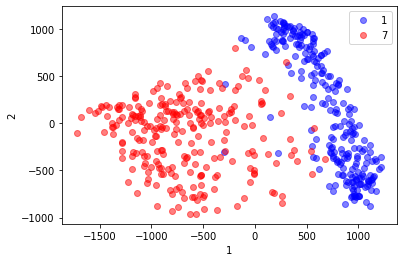

In [35]:
plt.plot(ones_proj[0, :], ones_proj[1, :], 'o', color='blue', alpha=0.5)
plt.plot(sevens_proj[0, :], sevens_proj[1, :], 'o', color='red', alpha=0.5)
plt.ylabel('2')
plt.xlabel('1')
plt.legend(('1', '7'))
#plt.savefig("./latex/figures/l12.pdf")

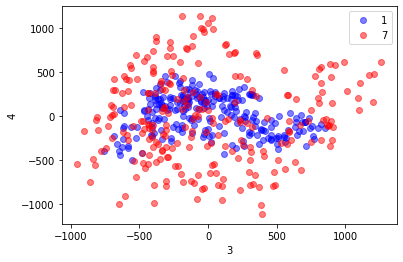

In [36]:
plt.plot(ones_proj[2, :], ones_proj[3, :], 'o', color='blue', alpha=0.5)
plt.plot(sevens_proj[2, :], sevens_proj[3, :], 'o', color='red', alpha=0.5)
plt.xlabel('3')
plt.ylabel('4')
plt.legend(('1', '7'))
#plt.savefig("./latex/figures/l34.pdf")

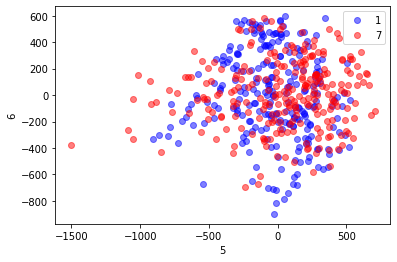

In [37]:
plt.plot(ones_proj[4, :], ones_proj[5, :], 'o', color='blue', alpha=0.5)
plt.plot(sevens_proj[4, :], sevens_proj[5, :], 'o', color='red', alpha=0.5)
plt.xlabel('5')
plt.ylabel('6')
plt.legend(('1', '7'))
#plt.savefig("./latex/figures/l56.pdf")

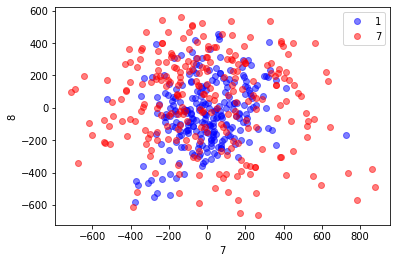

In [38]:
plt.plot(ones_proj[6, :], ones_proj[7, :], 'o', color='blue', alpha=0.5)
plt.plot(sevens_proj[6, :], sevens_proj[7, :], 'o', color='red', alpha=0.5)
plt.xlabel('7')
plt.ylabel('8')
plt.legend(('1', '7'))
#plt.savefig("./latex/figures/l78.pdf")

In [39]:
def create_kernel_matrix(kernelfunc, data):  
    return myarray(kernelfunc, data) 

def myarray(func, data):
    size = data.shape[0] 
    matrix = np.zeros((size, size))
    for i in range(0, size): 
        for j in range(0, size): 
            matrix[i, j] = func(data[i], data[j])
    return matrix

In [40]:
def chi_sq(x,y): 
    sum = 0
    for i in range(0, x.shape[0]): 
        sum += (x[i] - y[i])**2 / (x[i] + y[i])
    return sum

In [41]:
#pkernel = create_kernel_matrix(polyf, x17) 

In [42]:
#savedpk = pkernel

In [43]:
polyf = lambda x, y: (np.dot(x, y)+100) ** 2

pkernel = create_kernel_matrix(polyf, x17) 

# center the kernel. 
IU = np.identity(pkernel.shape[0]) - np.full((pkernel.shape[0], pkernel.shape[0]), 1 / pkernel.shape[0])
pkernel = tf.linalg.matmul(IU, tf.linalg.matmul(pkernel, IU))
pkernel += np.identity(pkernel.shape[0]) * 1e-6 # to ensure positive definitness. 
pe, pv = tf.linalg.eigh(pkernel)

In [44]:
pv = tf.reverse(pv, [1])
pe = tf.reverse(pe, [0])

In [45]:
spe = np.sqrt(pe)
w = np.zeros((pv.shape[0], pv.shape[1]))
for i in range(0, pv.shape[0]):
    w[i, :] = pv[i, :] * spe

In [46]:
pones_proj = []
psevens_proj = [] 
for i in ones: 
    pones_proj.append(w[i, 0:8]) # this might be wrong since we need columns not row vectors. 
for i in sevens: 
    psevens_proj.append(w[i, 0:8])
pones_proj = np.array(pones_proj).T
psevens_proj = np.array(psevens_proj).T
(pones_proj.shape, psevens_proj.shape)

((8, 248), (8, 252))

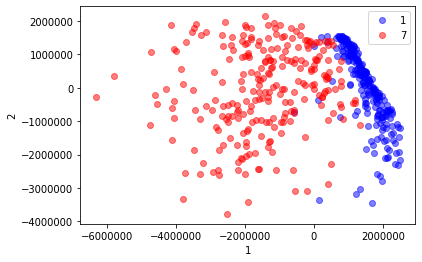

In [52]:
plt.plot(pones_proj[0, :], pones_proj[1, :], 'o', color='blue', alpha=0.5)
plt.plot(psevens_proj[0, :], psevens_proj[1, :], 'o', color='red', alpha=0.5)
plt.ylabel('2')
plt.xlabel('1')
plt.legend(('1', '7'))
#plt.savefig("./latex/figures/p12.pdf")

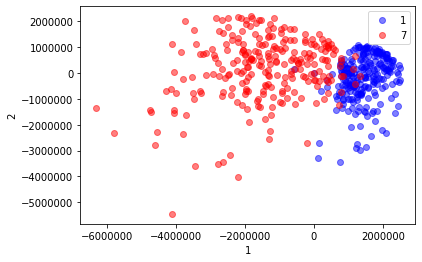

In [51]:
plt.plot(pones_proj[0, :], pones_proj[2, :], 'o', color='blue', alpha=0.5)
plt.plot(psevens_proj[0, :], psevens_proj[2, :], 'o', color='red', alpha=0.5)
plt.ylabel('2')
plt.xlabel('1')
plt.legend(('1', '7'))
#plt.savefig("./latex/figures/p12.pdf")

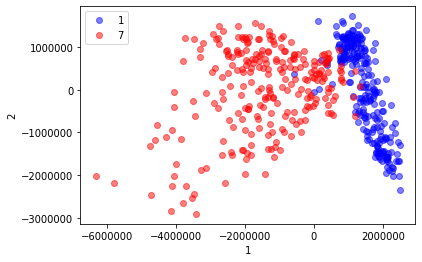

In [53]:
plt.plot(pones_proj[0, :], pones_proj[3, :], 'o', color='blue', alpha=0.5)
plt.plot(psevens_proj[0, :], psevens_proj[3, :], 'o', color='red', alpha=0.5)
plt.ylabel('2')
plt.xlabel('1')
plt.legend(('1', '7'))
#plt.savefig("./latex/figures/p12.pdf")

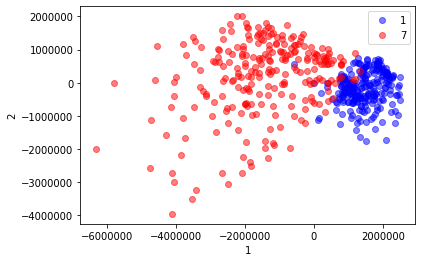

In [57]:
plt.plot(pones_proj[0, :], pones_proj[4, :], 'o', color='blue', alpha=0.5)
plt.plot(psevens_proj[0, :], psevens_proj[4, :], 'o', color='red', alpha=0.5)
plt.ylabel('2')
plt.xlabel('1')
plt.legend(('1', '7'))
#plt.savefig("./latex/figures/p12.pdf")

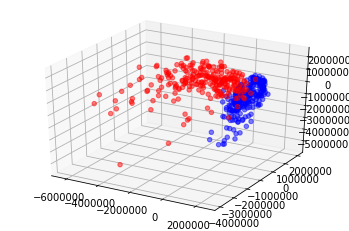

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pones_proj[0, :], pones_proj[4, :], pones_proj[2, :], 'o', color='blue', alpha=0.5)
ax.scatter(psevens_proj[0, :], psevens_proj[4, :], psevens_proj[2, :], 'o', color='red', alpha=0.5)
#ax.scatter(xs, ys, zs, c=c, marker=m)

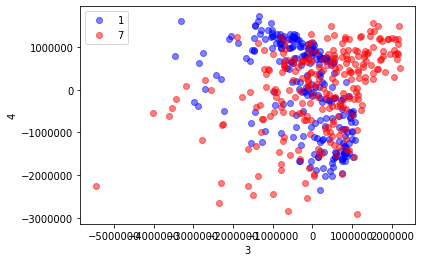

In [48]:
plt.plot(pones_proj[2, :], pones_proj[3, :], 'o', color='blue', alpha=0.5)
plt.plot(psevens_proj[2, :], psevens_proj[3, :], 'o', color='red', alpha=0.5)
plt.ylabel('4')
plt.xlabel('3')
plt.legend(('1', '7'))
plt.savefig("./latex/figures/p34.pdf")

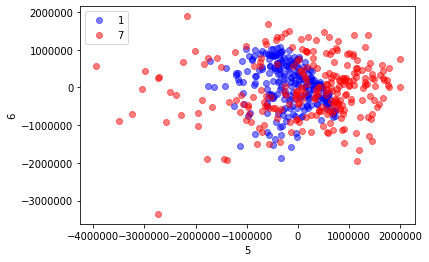

In [49]:
plt.plot(pones_proj[4, :], pones_proj[5, :], 'o', color='blue', alpha=0.5)
plt.plot(psevens_proj[4, :], psevens_proj[5, :], 'o', color='red', alpha=0.5)
plt.ylabel('6')
plt.xlabel('5')
plt.legend(('1', '7'))
plt.savefig("./latex/figures/p56.pdf")

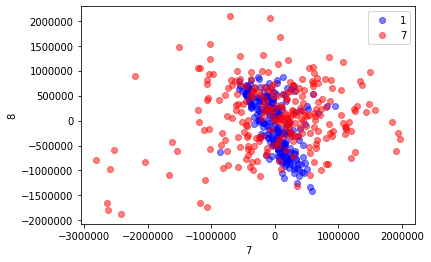

In [50]:
plt.plot(pones_proj[6, :], pones_proj[7, :], 'o', color='blue', alpha=0.5)
plt.plot(psevens_proj[6, :], psevens_proj[7, :], 'o', color='red', alpha=0.5)
plt.ylabel('8')
plt.xlabel('7')
plt.legend(('1', '7'))
plt.savefig("./latex/figures/p78.pdf")